In [1]:
import os, sys
import numpy as np
import matplotlib.pyplot as plt
from pyLIMA.outputs import pyLIMA_plots
from cycler import cycler
import pandas as pd
sys.path.append(os.path.dirname(os.getcwd()))
from functions_roman_rubin import sim_fit,sim_event
from functions_roman_rubin import model_rubin_roman, fit_rubin_roman
from functions_roman_rubin import read_data, save


/home/anibal-pc/roman_rubin


In [2]:

current_path = os.path.dirname(os.getcwd())
# print(current_path)
i=18 #select one event by its index in the TRILEGAL set
model='USBL'

path_TRILEGAL_set= current_path+'/TRILEGAL/PB_planet_split_1.csv'
path_to_save_model= current_path+'/test_sim_fit/'
path_to_save_fit= current_path+'/test_sim_fit/'
path_ephemerides= current_path+'/ephemerides/Gaia.txt'
path_dataslice = current_path+'/opsims/baseline/dataSlice.npy'
path_fit_rr = path_to_save_fit+f'/Event_RR_{i}_TRF.npy'
path_fit_roman =  path_to_save_fit+f'/Event_Roman_{i}_TRF.npy'
ZP = {'W149':27.615, 'u':27.03, 'g':28.38, 'r':28.16,
          'i':27.85, 'z':27.46, 'y':26.68}
colorbands={'W149':'b', 'u':'purple', 'g':'g', 'r':'red',
          'i':'yellow', 'z':'k', 'y':'cyan'}

## First we simulate the event 
The relevant code for this is the function sim_event(i, event_params, path_ephemerides, path_dataslice, model).

The output:

model(eg: pyLIMA.models.USBL_model.USBLmodel): the light curves, telescope name, etc.  
pyLIMA_parameters (dictionary): PyLIMA parameters.
decision (boolean): is made based on the detection criteria. This boolean is True if the event is a suitable candidate for fitting.

In [3]:
pd_planets = pd.read_csv(path_TRILEGAL_set)
event_params = pd_planets.iloc[int(i)]
my_own_model, pyLIMA_parameters, decision = sim_event(i, event_params, path_ephemerides, path_dataslice,model)

/home/anibal-pc/roman_rubin


/home/anibal-pc/anaconda3/envs/pyLIMA/lib/python3.9/site-packages/erfa/core.py:133: ErfaWarning: ERFA function "dtf2d" yielded 1 of "dubious year (Note 6)"
  warn(f'ERFA function "{func_name}" yielded {wmsg}', ErfaWarning)
/home/anibal-pc/anaconda3/envs/pyLIMA/lib/python3.9/site-packages/erfa/core.py:133: ErfaWarning: ERFA function "utctai" yielded 20736 of "dubious year (Note 3)"
  warn(f'ERFA function "{func_name}" yielded {wmsg}', ErfaWarning)
/home/anibal-pc/anaconda3/envs/pyLIMA/lib/python3.9/site-packages/erfa/core.py:133: ErfaWarning: ERFA function "taiutc" yielded 20736 of "dubious year (Note 4)"
  warn(f'ERFA function "{func_name}" yielded {wmsg}', ErfaWarning)
/home/anibal-pc/anaconda3/envs/pyLIMA/lib/python3.9/site-packages/erfa/core.py:133: ErfaWarning: ERFA function "utctai" yielded 1 of "dubious year (Note 3)"
  warn(f'ERFA function "{func_name}" yielded {wmsg}', ErfaWarning)
/home/anibal-pc/anaconda3/envs/pyLIMA/lib/python3.9/site-packages/erfa/core.py:133: ErfaWarning: 

Parallax(Full) estimated for the telescope W149: SUCCESS


/home/anibal-pc/anaconda3/envs/pyLIMA/lib/python3.9/site-packages/erfa/core.py:133: ErfaWarning: ERFA function "utcut1" yielded 12 of "dubious year (Note 3)"
  warn(f'ERFA function "{func_name}" yielded {wmsg}', ErfaWarning)
/home/anibal-pc/anaconda3/envs/pyLIMA/lib/python3.9/site-packages/erfa/core.py:133: ErfaWarning: ERFA function "utctai" yielded 96 of "dubious year (Note 3)"
  warn(f'ERFA function "{func_name}" yielded {wmsg}', ErfaWarning)
/home/anibal-pc/anaconda3/envs/pyLIMA/lib/python3.9/site-packages/erfa/core.py:133: ErfaWarning: ERFA function "taiutc" yielded 96 of "dubious year (Note 4)"
  warn(f'ERFA function "{func_name}" yielded {wmsg}', ErfaWarning)
/home/anibal-pc/anaconda3/envs/pyLIMA/lib/python3.9/site-packages/erfa/core.py:133: ErfaWarning: ERFA function "utcut1" yielded 96 of "dubious year (Note 3)"
  warn(f'ERFA function "{func_name}" yielded {wmsg}', ErfaWarning)
/home/anibal-pc/anaconda3/envs/pyLIMA/lib/python3.9/site-packages/erfa/core.py:133: ErfaWarning: ERF

Parallax(Full) estimated for the telescope u: SUCCESS
Parallax(Full) estimated for the telescope g: SUCCESS
Parallax(Full) estimated for the telescope r: SUCCESS
Parallax(Full) estimated for the telescope i: SUCCESS
Parallax(Full) estimated for the telescope z: SUCCESS
Parallax(Full) estimated for the telescope y: SUCCESS
['third_caustic', [0, 0]]
A good event to fit


In [4]:
print('if the criterias are satisfied by this event we obtain "True":', decision)

if the criterias are satisfied by this event we obtain "True": True


In [7]:
if decision:
    print("Save the simulated event")
    save(i, path_TRILEGAL_set, path_to_save_model, my_own_model, pyLIMA_parameters)



Save the simulated event
Saving...
File saved: /home/anibal-pc/roman_rubin/test_sim_fit/Event_18.h5


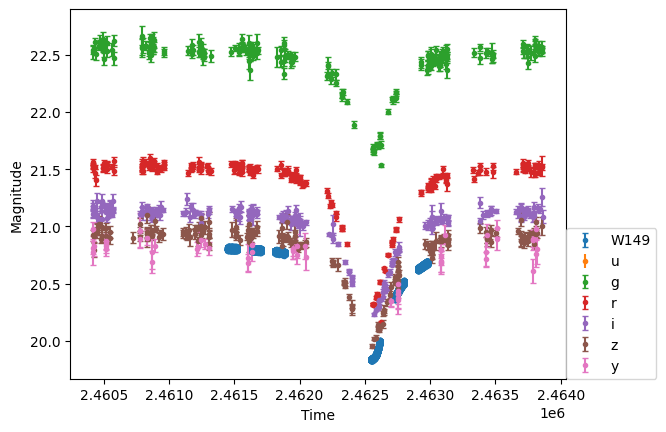

In [48]:
#plot without alignment

telescopes = my_own_model.event.telescopes

for telo in telescopes:
    plt.errorbar(telo.lightcurve_magnitude['time'],telo.lightcurve_magnitude['mag'],telo.lightcurve_magnitude['err_mag'],ls='',marker='.',capsize=2,label=telo.name)

plt.xlabel('Time')
plt.ylabel('Magnitude')
plt.legend(loc=(1,0))
plt.gca().invert_yaxis
plt.show()

## Plot this event with pyLIMA

We can use the functionality of pyLIMA to make plot with aligned data in order to see the peak asociated to a planet of this particular event

Comment on pyLIMA:

To plot these events, since in our model we use the positions of Gaia with a shift in time,
it is necessary to modify the pyLIMA code as follows:

 In /pyLIMA/toolbox/fake_telescopes.py, we must add 'spacecraft_positions' to the list
 in the function:

 replicate_a_telescope(microlensing_model, telescope_index, light_curve_time=None,
                        astrometry_curve_time=None):

 attributes_to_copy = ['name', 'filter', 'location', 'ld_gamma', 'ld_sigma', 'ld_a1',
                       'ld_a2', 'ld_gamma1', 'ld_gamma2', 'location', 'spacecraft_name',
                       'spacecraft_positions', 'pixel_scale']



In [27]:
info_dataset, pyLIMA_parameters, bands = read_data(path_to_save_model+'/Event_18.h5')
ulens_params = []
PAR = ['t_center','u_center','tE','rho','separation','mass_ratio','alpha','piEN','piEE']

for b in (PAR):
    ulens_params.append(pyLIMA_parameters[b])
flux_params = []
for b in bands:
    if not len(bands[b])==0:
        zp_Rubin_to_pyLIMA = (10**((-27.4+ZP[b])/2.5))
        
        flux_params.append(pyLIMA_parameters['fsource_'+b]/zp_Rubin_to_pyLIMA)
        flux_params.append(pyLIMA_parameters['ftotal_'+b]/zp_Rubin_to_pyLIMA)
        
true_params = ulens_params+flux_params


In [28]:
model_ulens = 'USBL'

Source = 18
event_params = pyLIMA_parameters
event_params['te']=event_params['tE']
event_params['s']=event_params['separation']
event_params['q']=event_params['mass_ratio']

f= 'W149'
wfirst_lc = np.array([bands[f]['time'],bands[f]['mag'],bands[f]['err_mag']]).T
f = 'u'
lsst_u = np.array([bands[f]['time'],bands[f]['mag'],bands[f]['err_mag']]).T
f='g'
lsst_g = np.array([bands[f]['time'],bands[f]['mag'],bands[f]['err_mag']]).T
f='r'
lsst_r = np.array([bands[f]['time'],bands[f]['mag'],bands[f]['err_mag']]).T
f='i'
lsst_i = np.array([bands[f]['time'],bands[f]['mag'],bands[f]['err_mag']]).T
f='z'
lsst_z = np.array([bands[f]['time'],bands[f]['mag'],bands[f]['err_mag']]).T
f='z'
lsst_y = np.array([bands[f]['time'],bands[f]['mag'],bands[f]['err_mag']]).T

model_true = model_rubin_roman(Source,True,event_params, path_ephemerides,model_ulens, wfirst_lc, lsst_u, lsst_g, lsst_r, lsst_i, lsst_z,
                    lsst_y)


check_event  : Everything looks fine...


/home/anibal-pc/anaconda3/envs/pyLIMA/lib/python3.9/site-packages/erfa/core.py:133: ErfaWarning: ERFA function "utctai" yielded 20736 of "dubious year (Note 3)"
  warn(f'ERFA function "{func_name}" yielded {wmsg}', ErfaWarning)
/home/anibal-pc/anaconda3/envs/pyLIMA/lib/python3.9/site-packages/erfa/core.py:133: ErfaWarning: ERFA function "taiutc" yielded 20736 of "dubious year (Note 4)"
  warn(f'ERFA function "{func_name}" yielded {wmsg}', ErfaWarning)


Parallax(Full) estimated for the telescope Roman (Roman+Rubin): SUCCESS
Parallax(Full) estimated for the telescope g (Rubin): SUCCESS
Parallax(Full) estimated for the telescope r (Rubin): SUCCESS
Parallax(Full) estimated for the telescope i (Rubin): SUCCESS
Parallax(Full) estimated for the telescope z (Rubin): SUCCESS
Parallax(Full) estimated for the telescope y (Rubin): SUCCESS


/home/anibal-pc/anaconda3/envs/pyLIMA/lib/python3.9/site-packages/erfa/core.py:133: ErfaWarning: ERFA function "utctai" yielded 1 of "dubious year (Note 3)"
  warn(f'ERFA function "{func_name}" yielded {wmsg}', ErfaWarning)
/home/anibal-pc/anaconda3/envs/pyLIMA/lib/python3.9/site-packages/erfa/core.py:133: ErfaWarning: ERFA function "taiutc" yielded 1 of "dubious year (Note 4)"
  warn(f'ERFA function "{func_name}" yielded {wmsg}', ErfaWarning)
/home/anibal-pc/anaconda3/envs/pyLIMA/lib/python3.9/site-packages/erfa/core.py:133: ErfaWarning: ERFA function "utctai" yielded 96 of "dubious year (Note 3)"
  warn(f'ERFA function "{func_name}" yielded {wmsg}', ErfaWarning)
/home/anibal-pc/anaconda3/envs/pyLIMA/lib/python3.9/site-packages/erfa/core.py:133: ErfaWarning: ERFA function "taiutc" yielded 96 of "dubious year (Note 4)"
  warn(f'ERFA function "{func_name}" yielded {wmsg}', ErfaWarning)
/home/anibal-pc/anaconda3/envs/pyLIMA/lib/python3.9/site-packages/erfa/core.py:133: ErfaWarning: ERFA 

In [30]:

if len(true_params) != len(model_true.model_dictionnary):
    telescopes_fluxes = model_true.find_telescopes_fluxes(true_params)
    telescopes_fluxes = [getattr(telescopes_fluxes, key) for key in
                         telescopes_fluxes]#._fields]
    model_parameters3 = np.r_[true_params, telescopes_fluxes]
else:
    model_parameters3 = true_params


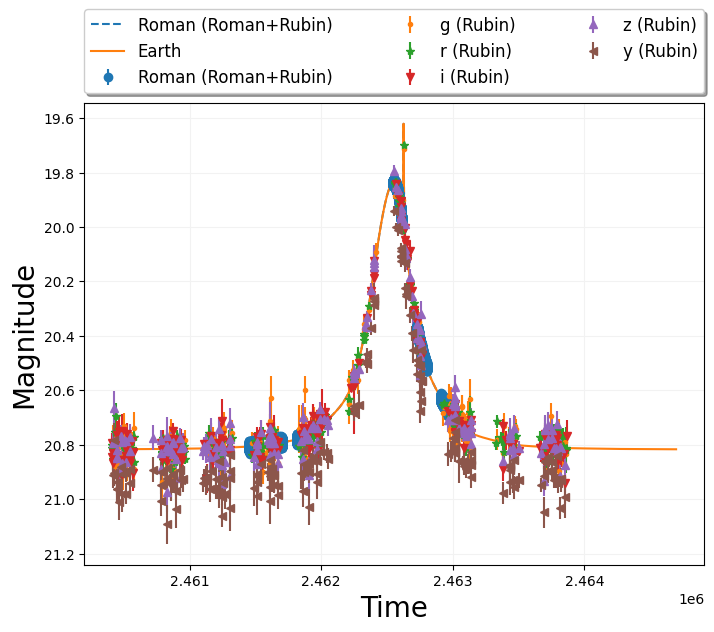

In [46]:
fig, axes = plt.subplots(1, 1,figsize=(8,6))

axes.set_ylabel("Magnitude",fontsize=20)
axes.set_xlabel("Time",fontsize=20)
axes.grid(True, color='0.95')
axes.invert_yaxis()
# axes.set_title('Simulated event')


pyLIMA_plots.plot_photometric_models(axes, model_true, true_params, plot_unit='Mag')
pyLIMA_plots.plot_aligned_data(axes, model_true, true_params, plot_unit='Mag')
colors = ['darkslategray', 'gray', 'lightgray']

axes.legend(shadow=True, fontsize='large',
                          bbox_to_anchor=(0, 1.02, 1, 0.2),
                          loc="lower left",
                          mode="expand", borderaxespad=0, ncol=3)
plt.show()


# Fits

Relevant function fit_rubin_roman 

This function performs fitting of microlensing events using data from both the Rubin Observatory (LSST) and the Roman Space Telescope (WFIRST). It supports different microlensing models: Finite-Source Point Lens (FSPL), Uniform Source Binary Lens (USBL), and Point Source Point Lens (PSPL). The function also allows the use of different fitting algorithms, including TRF (Trust Region Reflective), MCMC (Markov Chain Monte Carlo), and DE (Differential Evolution).

In [47]:
algo='TRF'

Source = i
if decision:
    # print("Save the data and fit with ",algo)
    # save(i, path_TRILEGAL_set, path_to_save_model, my_own_model, pyLIMA_parameters)
    lc_to_fit = {}
    for telo in my_own_model.event.telescopes:
        if not len(telo.lightcurve_magnitude['mag'])==0:
            df = telo.lightcurve_magnitude.to_pandas()
            lc_to_fit[telo.name] = df.values
        else:
            lc_to_fit[telo.name] = []
    origin = my_own_model.origin
    fit_rr, event_fit_rr, pyLIMAmodel_rr = fit_rubin_roman(Source,event_params, path_to_save_fit, path_ephemerides,model,algo,origin,
                               lc_to_fit["W149"], lc_to_fit["u"], lc_to_fit["g"], lc_to_fit["r"],
                                           lc_to_fit["i"], lc_to_fit["z"],lc_to_fit["y"])
    fit_roman, event_fit_roman, pyLIMAmodel_roman = fit_rubin_roman(Source,event_params, path_to_save_fit, path_ephemerides,model,algo,origin,
                               lc_to_fit["W149"], [], [], [], [], [],[])


Save the data and fit with  TRF
Saving...
File saved: /home/anibal-pc/roman_rubin/test_sim_fit/Event_18.h5
check_event  : Everything looks fine...


/home/anibal-pc/anaconda3/envs/pyLIMA/lib/python3.9/site-packages/erfa/core.py:133: ErfaWarning: ERFA function "utctai" yielded 20736 of "dubious year (Note 3)"
  warn(f'ERFA function "{func_name}" yielded {wmsg}', ErfaWarning)
/home/anibal-pc/anaconda3/envs/pyLIMA/lib/python3.9/site-packages/erfa/core.py:133: ErfaWarning: ERFA function "taiutc" yielded 20736 of "dubious year (Note 4)"
  warn(f'ERFA function "{func_name}" yielded {wmsg}', ErfaWarning)


Parallax(Full) estimated for the telescope Roman: SUCCESS
Parallax(Full) estimated for the telescope g: SUCCESS
Parallax(Full) estimated for the telescope r: SUCCESS
Parallax(Full) estimated for the telescope i: SUCCESS
Parallax(Full) estimated for the telescope z: SUCCESS
Parallax(Full) estimated for the telescope y: SUCCESS


/home/anibal-pc/anaconda3/envs/pyLIMA/lib/python3.9/site-packages/erfa/core.py:133: ErfaWarning: ERFA function "utctai" yielded 1 of "dubious year (Note 3)"
  warn(f'ERFA function "{func_name}" yielded {wmsg}', ErfaWarning)
/home/anibal-pc/anaconda3/envs/pyLIMA/lib/python3.9/site-packages/erfa/core.py:133: ErfaWarning: ERFA function "taiutc" yielded 1 of "dubious year (Note 4)"
  warn(f'ERFA function "{func_name}" yielded {wmsg}', ErfaWarning)
/home/anibal-pc/anaconda3/envs/pyLIMA/lib/python3.9/site-packages/erfa/core.py:133: ErfaWarning: ERFA function "utctai" yielded 96 of "dubious year (Note 3)"
  warn(f'ERFA function "{func_name}" yielded {wmsg}', ErfaWarning)
/home/anibal-pc/anaconda3/envs/pyLIMA/lib/python3.9/site-packages/erfa/core.py:133: ErfaWarning: ERFA function "taiutc" yielded 96 of "dubious year (Note 4)"
  warn(f'ERFA function "{func_name}" yielded {wmsg}', ErfaWarning)
/home/anibal-pc/anaconda3/envs/pyLIMA/lib/python3.9/site-packages/erfa/core.py:133: ErfaWarning: ERFA 

initial_guess  : Initial parameters guess SUCCESS
Using guess:  [2462555.2092552674, 0.30260371100878064, 351.03436333528964, 9.353665605734084e-05, 1.1478599290943858, 0.0004842690847154, 2.170221123244217, 0.0058858226795134, -0.0320152930579978, 261.92332561608146, 227.1020197745454, 49.16169266311294, 44.95377491290438, 198.17008039184716, 115.85956729838873, 182.22793064946242, 166.46665663900635, 228.6265740239188, 198.9413151678031, 276.50461678243636, 218.25714149463693]
fit  : Trust Region Reflective fit SUCCESS
best_model: [2462548.2684595906, 0.23166391533638672, 445.56442813696003, 0.0001620994932991035, 0.9119518248542027, 0.0003087443093186362, 1.9685273881686651, -0.0029609792970738285, -0.012240053448344177, 186.45172612281132, 427.8100897948388, 35.08627607361698, 86.57299874310381, 140.88788907358767, 221.8093441858282, 127.1214061170674, 320.71644709371594, 160.2527822370197, 380.3684369578623, 182.25642152224404, 415.81603321401974] chi2 48962.23952696072
check_even

In [80]:

true_params

[2462592.427461098,
 0.1474368375383864,
 351.03436333528964,
 9.353665605734084e-05,
 1.1478599290943858,
 0.0004842690847154,
 2.170221123244217,
 0.0058858226795134,
 -0.0320152930579978,
 260.19417111536217,
 429.4177578595774,
 46.362339401811816,
 87.0963589956079,
 188.73012709280647,
 223.04885593776075,
 173.42207027361425,
 321.21809339879815,
 218.2368732493731,
 381.94427084004604,
 255.32803384449846,
 425.40246294406774]

Chi square reduced for Roman 1.1123148836991368
p-value of a chi squared test 2.540741837656348e-55
We see a very low p-value this indicates that is unlikely that the model follow the data.


([<matplotlib.axis.XTick at 0x735b2d63d9d0>,
 [Text(0, 0, 't0'),
  Text(1, 0, 'u0'),
  Text(2, 0, 'tE'),
  Text(3, 0, 'rho'),
  Text(4, 0, 's'),
  Text(5, 0, 'q'),
  Text(6, 0, 'alpha'),
  Text(7, 0, 'piEN'),
  Text(8, 0, 'piEE'),
  Text(9, 0, 'F146_s'),
  Text(10, 0, 'F146_b')])

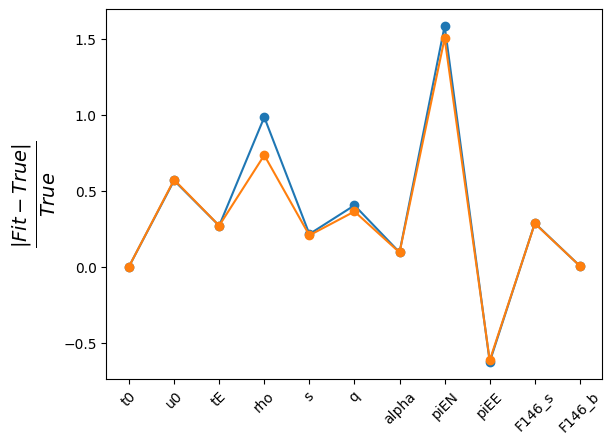

In [103]:
#we can make some tests to check if this is a good event before make the plot
from scipy.stats import chi2
chi2_roman = fit_roman.fit_results['chi2']
DOF_roman = len(pyLIMAmodel_roman.event.telescopes[0].lightcurve_magnitude['time'])-len(fit_roman.fit_results['best_model'])
print('Chi square reduced for Roman', chi2_roman/DOF_roman)
print('p-value of a chi squared test', chi2.sf(chi2_roman, DOF_roman))
print('We see a very low p-value this indicates that is unlikely that the model follow the data.')
#metrics
plt.plot(abs(np.array(true_params[0:len(fit_roman.fit_results['best_model'])])-fit_roman.fit_results['best_model'])/np.array(true_params[0:len(fit_roman.fit_results['best_model'])]), marker='o')
plt.plot((abs(np.array(true_params[0:len(fit_rr.fit_results['best_model'])])-fit_rr.fit_results['best_model'])/np.array(true_params[0:len(fit_rr.fit_results['best_model'])]))[0:len(fit_roman.fit_results['best_model'])], marker='o')
plt.ylabel(r'$\frac{|Fit-True|}{True}$',fontsize=20)
plt.xticks([0,1,2,3,4,5,6,7,8,9,10],['t0','u0','tE','rho','s','q','alpha','piEN','piEE','F146_s','F146_b'],rotation=45)

In [ ]:
# np.load(path_to_save_fit+'Event_Roman_18_TRF.npy',allow_pickle=True).item()
# np.load(path_to_save_fit+'Event_RR_18_TRF.npy',allow_pickle=True).item()

In [ ]:
# info_dataset, pyLIMA_parameters, bands = my_own_model, pyLIMA_parameters
# data_fit_roman = fit_roman

In [ ]:

# info_dataset, pyLIMA_parameters, bands = read_data(path_to_save_model+'/Event_18.h5')
data_fit_rr = np.load(path_to_save_fit+'Event_RR_18_TRF.npy',allow_pickle=True).item()
data_fit_roman = np.load(path_to_save_fit+'Event_Roman_18_TRF.npy',allow_pickle=True).item()


In [ ]:
# print(data_fit_rr['best_model'])
# print(data_fit_roman['best_model'])
# print(pyLIMA_parameters)


In [ ]:

# {'t_center':data_fit_rr['best_model'][0]}
model_rr = model_rubin_roman(Source,False,event_params, path_ephemerides,model_ulens, wfirst_lc, lsst_u, lsst_g, lsst_r, lsst_i, lsst_z,
                    lsst_y)
# {'t_center':data_fit_roman['best_model'][0]}
model_roman = model_rubin_roman(Source,False,event_params, path_ephemerides,model_ulens, wfirst_lc, [], [], [], [], [],[])

# model1 = model_rubin_roman(Source,event_params, path_ephemerides,model_ulens, wfirst_lc, lsst_u, lsst_g, lsst_r, lsst_i, lsst_z,
#                     lsst_y)

In [ ]:
plt.close('all')
# custom_cycler = (cycler(color=custom_color))

# pyLIMA_plots.MARKERS_COLORS = custom_cycler
# pyLIMA_plots.MARKER_SYMBOLS = np.array([custom_marker])
### Find the telescope fluxes if needed

if len(data_fit_rr['best_model']) != len(model_rr.model_dictionnary):
    telescopes_fluxes = model_rr.find_telescopes_fluxes(data_fit_rr['best_model'])
    telescopes_fluxes = [telescopes_fluxes[key] for key in
                         telescopes_fluxes]#._fields]
    model_parameters1 = np.r_[data_fit_rr['best_model'], telescopes_fluxes]
else:
    model_parameters1 = data_fit_rr['best_model']

    
if len(data_fit_roman['best_model']) != len(model_roman.model_dictionnary):
    telescopes_fluxes = model_roman.find_telescopes_fluxes(data_fit_roman['best_model'])
    telescopes_fluxes = [telescopes_fluxes[key] for key in
                         telescopes_fluxes]#._fields]
    model_parameters2 = np.r_[data_fit_rr['best_model'], telescopes_fluxes]
else:
    model_parameters2 = data_fit_rr['best_model']

# if len(true_params) != len(model_true.model_dictionnary):
#     telescopes_fluxes = model_true.find_telescopes_fluxes(true_params)
#     telescopes_fluxes = [getattr(telescopes_fluxes, key) for key in
#                          telescopes_fluxes]#._fields]
#     model_parameters3 = np.r_[true_params, telescopes_fluxes]
# else:
#     model_parameters3 = true_params


In [ ]:
# tmin, tmax = 2460200., data_ogle[-1,0]+5.
# tmin, tmax = 2460160., data_ogle[-1,0]+20.

%matplotlib inline
fig, axes = plt.subplots(3, 1,figsize=(10,10), height_ratios=[3, 1,1], sharex=True)

# Lc plot
axes[0].title.set_text('name')
axes[0].set_ylabel("magnitude") 
axes[0].grid(True, color='0.95')
axes[0].invert_yaxis()
# axes[0].set_xlim(tmin, tmax)
# axes[0].set_ylim(18.5, 12.5) 
# axes[0].set_ylim(17.5, 12.5) 

#Plot model1 and align data to it
pyLIMA_plots.plot_photometric_models(axes[0], model_rr, data_fit_rr['best_model'], plot_unit='Mag')
pyLIMA_plots.plot_photometric_models(axes[0], model_roman, data_fit_roman['best_model'], plot_unit='Mag')
# pyLIMA_plots.plot_photometric_models(axes[0], model_true, true_params, plot_unit='Mag')
pyLIMA_plots.plot_aligned_data(axes[0], model_rr, data_fit_rr['best_model'], plot_unit='Mag')
# model_parameters2
# model_parameters3
colors = ['darkslategray', 'gray', 'lightgray']

# for i in range(len(spec_jds)):
#     axes[0].axvline(x=spec_jds[i], label='Spec_'+str(i), ls='--', color=colors[i])

# plot residuals
axes[1].set_ylabel("$\Delta m_{RR} $") 
axes[1].grid(True, color='0.95')
axes[2].set_ylabel("$\Delta m_{Roman} $") 
axes[2].grid(True, color='0.95')

pyLIMA_plots.plot_residuals(axes[1], model_rr, data_fit_rr['best_model'], plot_unit='Mag')
pyLIMA_plots.plot_residuals(axes[2], model_roman, data_fit_roman['best_model'], plot_unit='Mag')
# axes[1].set_xlim(tmin, tmax)
axes[1].set_ylim(-2.5, 1)
axes[1].axhline(y=0)

# for i in range(len(spec_jds)):
#     axes[1].axvline(x=spec_jds[i], ls='--', color=colors[i])

axes[0].legend(shadow=True, fontsize='large',
                          bbox_to_anchor=(0, 1.02, 1, 0.2),
                          loc="lower left",
                          mode="expand", borderaxespad=0, ncol=3)
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import pyLIMA

microlensing_model = model_rr

pyLIMA_parameters = microlensing_model.compute_pyLIMA_parameters(data_fit_rr['best_model'])

# Define the number of subplots, adjust the number of rows and columns as needed
num_telescopes = len(microlensing_model.event.telescopes)
rows = 2  # Set the number of rows for the grid
cols = (num_telescopes + 1) // rows  # Set the number of columns based on the number of telescopes

fig, axes = plt.subplots(rows, cols, figsize=(12, 8))
axes = axes.flatten()  # Flatten the axes array to easily iterate

for ind, tel in enumerate(microlensing_model.event.telescopes):
    if tel.lightcurve_flux is not None:
        residus_in_mag = pyLIMA.fits.objective_functions.photometric_residuals_in_magnitude(
            tel, microlensing_model, pyLIMA_parameters
        )

        # Plot the histogram in the corresponding subplot
        axes[ind].hist(residus_in_mag,bins=25, edgecolor='k', alpha=0.5)
        axes[ind].set_title(f'Band {tel.name}')
        axes[ind].axvline(0, color='red')
    
# Adjust layout to prevent overlapping
plt.suptitle('Residus in magnitude')
plt.tight_layout()
plt.show()


In [ ]:
nparams_ulens = 9

npts_rr = [] 
for key in bands:
    npts_rr.append(len(bands[key]))
# print(sum(npts_rr))
dof_rr = sum(npts_rr) - nparams_ulens - 2*len(bands)
print(dof_rr)
npts_roman = len(bands['W149'])
# print(npts_roman)
dof_roman = npts_roman - nparams_ulens - 2
print(dof_roman)


chi2_rr = data_fit_rr['chi2']

chi2_roman = data_fit_roman['chi2']